# Exercise Myoelectric Control for Artificial Limbs

I will implement an ordinary least squares estimator

$
W = (XX^\top)^{-1}XY^\top
$

for prediction of 2 dimensional hand positions from electromyographic recordings obtained with a high-density electrode array of the lower arm. 

In the data file you will find training data and labels. The data are bandpower time series in 192 dimensions (electrodes). The labels are 2 dimensional hand positions measured with a motion capture system. You will also find test data, for which no labels will be provided. The data loading routine already does the log-transform of the bandpower data, so you can just go ahead and compute the Ordinary Least Squares solution. 

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.linalg import inv
from scipy.io import loadmat
import matplotlib.pyplot as plt

def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    X = sp.log(data['training_data'])
    Y = data['training_labels']
    Xtest = sp.log(data['test_data'])
    return X,Y,Xtest

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  


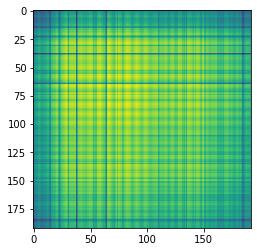

In [2]:
X,Y,Xtest = load_data('myo_data.mat')
plt.imshow(X @ X.T)

# Inspecting the Training data

We can plot the training data labels to see which hand movements were performed during the recording of the training data. 

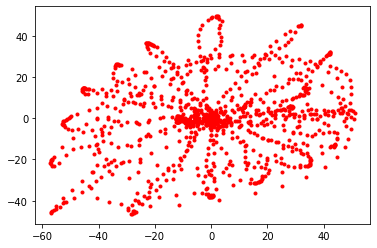

In [3]:
plt.plot(Y[0,:],Y[1,:],'r.')

Implement the ordinary least squares estimator above in order to predict the hand position from the myoelectric data. 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  


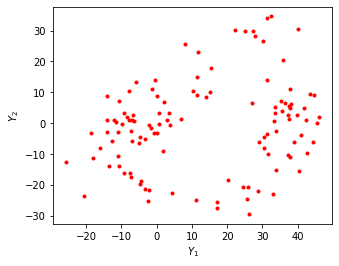

In [4]:
X,Y,Xtest = load_data('myo_data.mat')

# Compute ordinary least squares solution


W= (np.linalg.inv(X @ X.T)) @ (X @ Y.T)
# predict test data
Ytest = W.T.dot(Xtest)

# plot
fig = pl.figure(figsize=(5,4))
fig.clf()
pl.plot(Ytest[0,:],Ytest[1,:],'r.')
pl.xlabel('$Y_1$')
pl.ylabel('$Y_2$');